## 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Reading Training Data

In [2]:
train_df = pd.read_csv('../data/train_data.csv')
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,Delhi,11:40:00,14:35:00,175,0.0,No info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No info,8366
4,Jet Airways,2019-03-12,Banglore,Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No info,6152


In [3]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          6695 non-null   str    
 1   date_of_journey  6695 non-null   str    
 2   source           6695 non-null   str    
 3   destination      6695 non-null   str    
 4   dep_time         6695 non-null   str    
 5   arrival_time     6695 non-null   str    
 6   duration         6695 non-null   int64  
 7   total_stops      6694 non-null   float64
 8   additional_info  6695 non-null   str    
 9   price            6695 non-null   int64  
dtypes: float64(1), int64(2), str(7)
memory usage: 523.2 KB


## 3. Missing Value Imputation

In [4]:
train_df.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [5]:
train_df.total_stops.unique()

array([ 1.,  0.,  2.,  3., nan])

### <font color='red'>Observation</font>
- `total_stops` column is having one missing value; dropping off will be best option.

In [6]:
train_df.dropna(inplace=True)

In [7]:
train_df.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

In [8]:
train_df.shape

(6694, 10)

## 4. General Analysis

In [9]:
train_df.describe(include=np.number)

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,633.371676,0.801464,9031.197341
std,502.951999,0.659737,4639.830703
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,920.000000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [10]:
train_df.describe(include='string')

,airline,date_of_journey,source,destination,dep_time,arrival_time,additional_info
count,6694,6694,6694,6694,6694,6694,6694
unique,9,40,5,5,217,220,7
top,Jet Airways,2019-05-21,Delhi,Cochin,18:55:00,19:00:00,No info
freq,2391,335,2729,2729,159,376,5248


## 5. Conversation of datatypes

In [11]:
train_df = train_df.assign(
    date_of_journey = lambda x:pd.to_datetime(x.date_of_journey,dayfirst=True),
    dep_time = lambda x:pd.to_datetime(x.dep_time,format='mixed').dt.time,
    arrival_time = lambda x:pd.to_datetime(x.arrival_time,format='mixed').dt.time,
    total_stops = lambda x:x.total_stops.astype('string')
)

/var/folders/c3/qlc29pfs0cg2d8j3tpcgz2m00000gp/T/ipykernel_80341/832881506.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  date_of_journey = lambda x:pd.to_datetime(x.date_of_journey,dayfirst=True),


In [12]:
train_df.info()

<class 'pandas.DataFrame'>
Index: 6694 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   str           
 1   date_of_journey  6694 non-null   datetime64[us]
 2   source           6694 non-null   str           
 3   destination      6694 non-null   str           
 4   dep_time         6694 non-null   object        
 5   arrival_time     6694 non-null   object        
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   string        
 8   additional_info  6694 non-null   str           
 9   price            6694 non-null   int64         
dtypes: datetime64[us](1), int64(2), object(2), str(4), string(1)
memory usage: 575.3+ KB


## 6. Univarate Analysis

### 6.1. airline

In [99]:
train_df.airline.nunique()

9

In [13]:
train_df.airline.value_counts()

airline
Jet Airways          2391
Indigo               1296
Air India            1075
Multiple Carriers     736
Spicejet              537
Vistara               322
Air Asia              211
Goair                 125
Trujet                  1
Name: count, dtype: int64

/var/folders/c3/qlc29pfs0cg2d8j3tpcgz2m00000gp/T/ipykernel_80341/1264565921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(train_df.airline.value_counts(),palette='pastel')


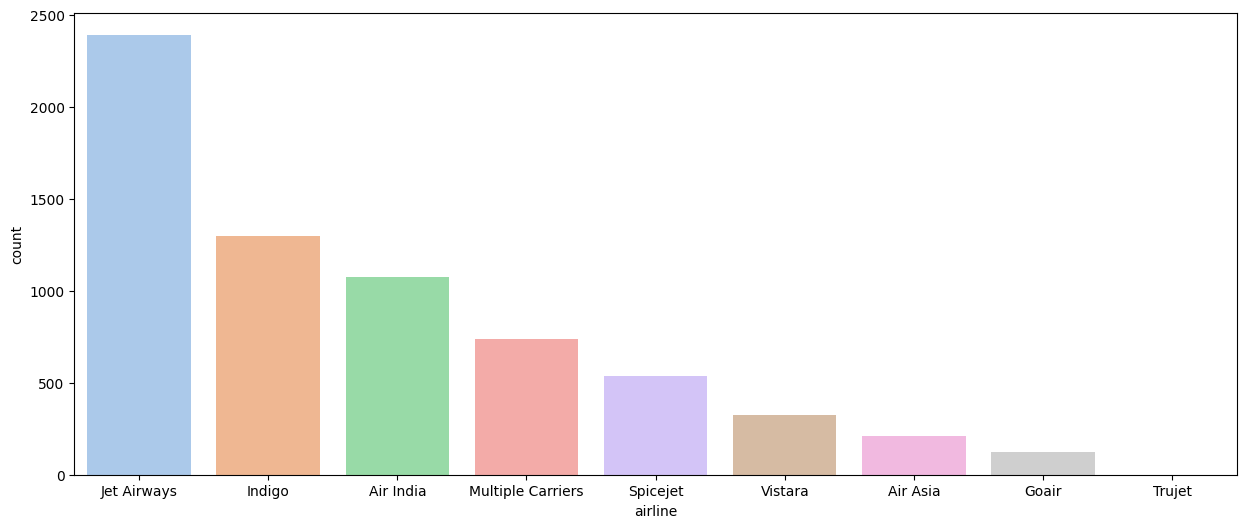

In [14]:
plt.figure(figsize=(15,6))
sns.barplot(train_df.airline.value_counts(),palette='pastel')
plt.show()

In [15]:
train_df.airline.mode()

0    Jet Airways
Name: airline, dtype: str

In [61]:
count = train_df.airline.value_counts(normalize=True)
count

airline
Jet Airways          0.357186
Indigo               0.193606
Air India            0.160592
Multiple Carriers    0.109949
Spicejet             0.080221
Vistara              0.048103
Air Asia             0.031521
Goair                0.018673
Trujet               0.000149
Name: proportion, dtype: float64

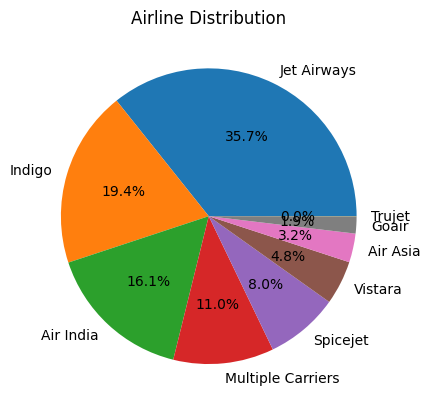

In [70]:
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('Airline Distribution')
plt.show()

In [76]:
mask = count <0.1
result = count.groupby(lambda x:x if not mask[x] else 'Others').sum().sort_values(ascending=False)
result

airline
Jet Airways          0.357186
Indigo               0.193606
Others               0.178667
Air India            0.160592
Multiple Carriers    0.109949
Name: proportion, dtype: float64

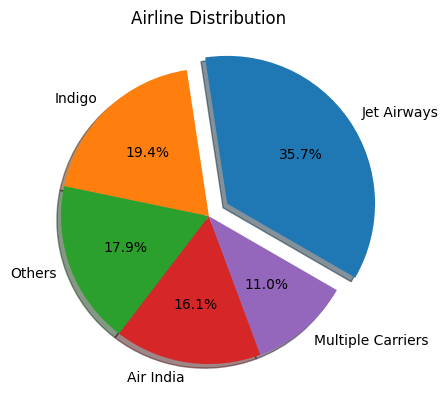

In [97]:
plt.pie(result, labels=result.index, autopct='%1.1f%%', explode=[0.15,0,0,0,0], startangle=-30, shadow=True)
plt.title('Airline Distribution')
plt.show()

### 3.2. date_of_journey

In [17]:
train_df.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[us]

In [18]:
train_df.date_of_journey.unique()

<DatetimeArray>
['2019-03-21 00:00:00', '2019-03-27 00:00:00', '2019-03-09 00:00:00',
 '2019-06-12 00:00:00', '2019-03-12 00:00:00', '2019-04-21 00:00:00',
 '2019-04-01 00:00:00', '2019-06-15 00:00:00', '2019-06-09 00:00:00',
 '2019-05-09 00:00:00', '2019-05-06 00:00:00', '2019-06-24 00:00:00',
 '2019-05-15 00:00:00', '2019-06-06 00:00:00', '2019-03-24 00:00:00',
 '2019-06-01 00:00:00', '2019-05-24 00:00:00', '2019-06-18 00:00:00',
 '2019-05-21 00:00:00', '2019-04-15 00:00:00', '2019-05-27 00:00:00',
 '2019-03-01 00:00:00', '2019-05-01 00:00:00', '2019-03-06 00:00:00',
 '2019-03-03 00:00:00', '2019-06-27 00:00:00', '2019-03-18 00:00:00',
 '2019-05-18 00:00:00', '2019-04-24 00:00:00', '2019-04-09 00:00:00',
 '2019-03-15 00:00:00', '2019-06-03 00:00:00', '2019-05-03 00:00:00',
 '2019-04-03 00:00:00', '2019-04-12 00:00:00', '2019-05-12 00:00:00',
 '2019-04-06 00:00:00', '2019-04-27 00:00:00', '2019-06-21 00:00:00',
 '2019-04-18 00:00:00']
Length: 40, dtype: datetime64[us]

In [19]:
train_df.date_of_journey.min()

Timestamp('2019-03-01 00:00:00')

In [20]:
train_df.date_of_journey.max()

Timestamp('2019-06-27 00:00:00')

In [114]:
train_df.date_of_journey.dt.day_name().value_counts()

date_of_journey
Wednesday    1273
Monday       1162
Thursday     1114
Saturday     1048
Sunday        915
Friday        603
Tuesday       579
Name: count, dtype: int64

In [110]:
train_df.date_of_journey.dt.month_name().value_counts()

date_of_journey
May      2217
June     2081
March    1683
April     713
Name: count, dtype: int64

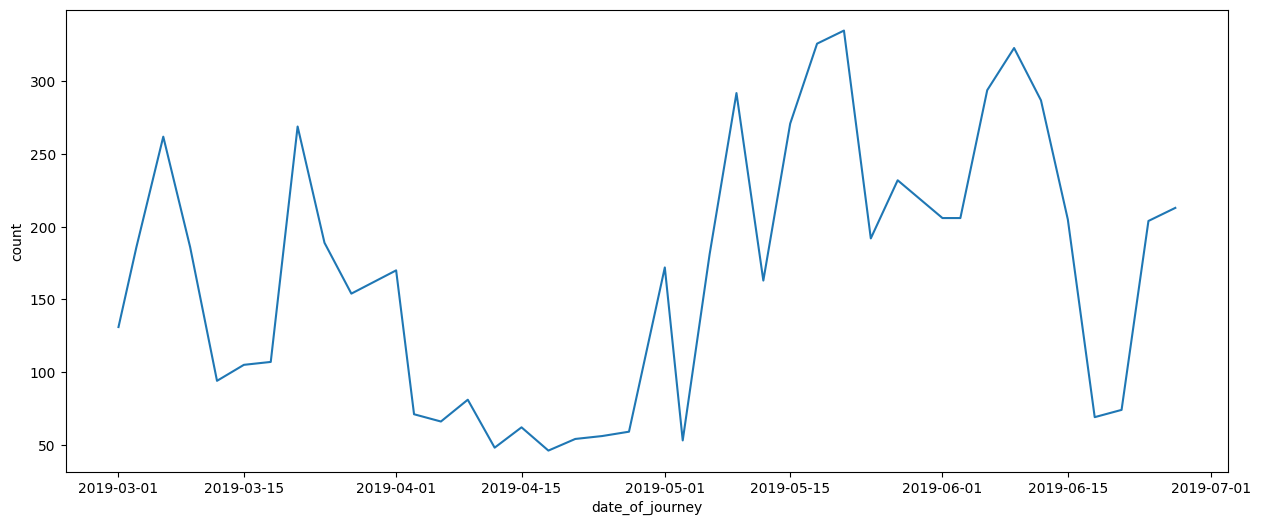

In [120]:
plt.figure(figsize=(15,6))
sns.lineplot(train_df.date_of_journey.value_counts())
plt.show()

### 3.3. source

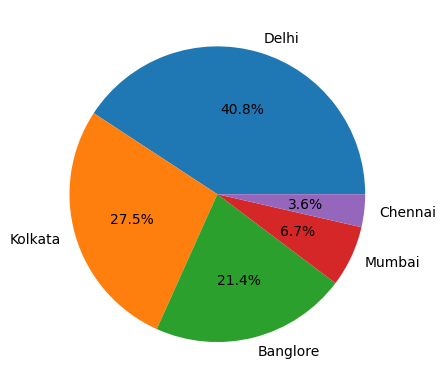

In [125]:
count = train_df.source.value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.show()

### 3.4. destination

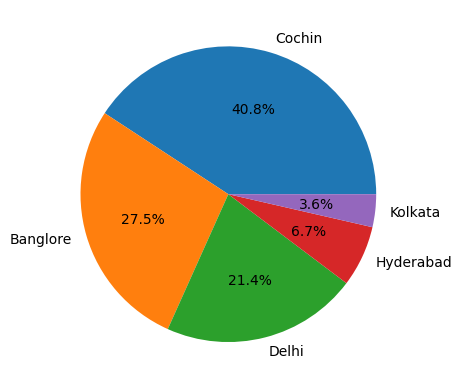

In [129]:
count = train_df.destination.value_counts()
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.show()

### 3.5. dep_time

In [134]:
train_df.dep_time

0       08:55:00
1       17:30:00
2       11:40:00
3       09:25:00
4       22:55:00
          ...   
6690    10:45:00
6691    09:25:00
6692    14:00:00
6693    07:55:00
6694    11:50:00
Name: dep_time, Length: 6694, dtype: object

In [143]:
b = [datetime.time(0),datetime.time(4),datetime.time(8),datetime.time(12),datetime.time(16),datetime.time(20),datetime.time(23)]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
train_df.dep_time.groupby(pd.cut(train_df.dep_time,bins=b,labels=l)).count()


dep_time
Late Night        221
Early Morning    1530
Morning          1689
Noon              876
Evening          1412
Night             887
Name: dep_time, dtype: int64

In [146]:
train_df.arrival_time.groupby(pd.cut(train_df.arrival_time,bins=b,labels=l)).count()

arrival_time
Late Night        628
Early Morning     845
Morning          1199
Noon              944
Evening          1694
Night            1121
Name: arrival_time, dtype: int64

### 3.5. duration

In [147]:
train_df.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [153]:
train_df.duration.max()/60

np.float64(47.666666666666664)

In [152]:
train_df.duration.min()/60

np.float64(1.25)

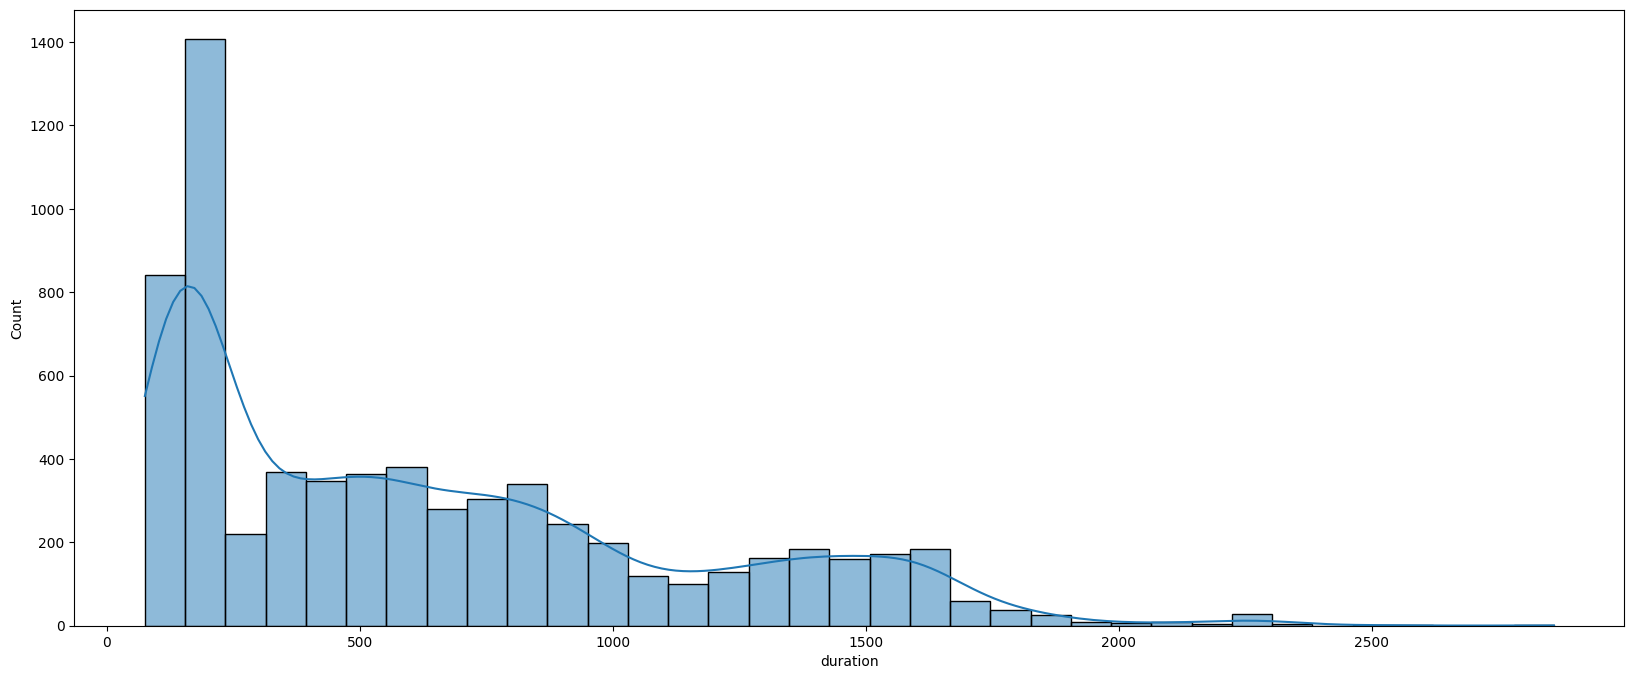

In [183]:
plt.figure(figsize=(20,8))
sns.histplot(train_df.duration,kde=True)
plt.show()

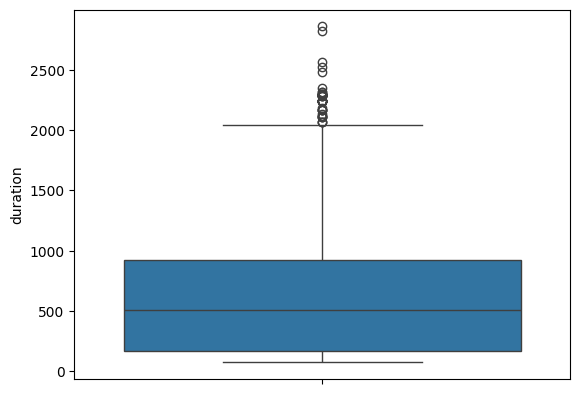

In [185]:
sns.boxplot(train_df.duration)
plt.show()

### 3.6. total_stops

In [154]:
train_df.total_stops

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6690    2.0
6691    1.0
6692    1.0
6693    1.0
6694    1.0
Name: total_stops, Length: 6694, dtype: string

In [155]:
train_df.total_stops.unique()

<StringArray>
['1.0', '0.0', '2.0', '3.0']
Length: 4, dtype: string

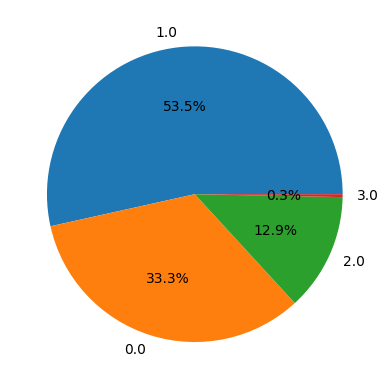

In [161]:
counts = train_df.total_stops.value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.show()

### 3.7. additional_info

In [163]:
train_df.additional_info.unique()

<StringArray>
[ 'In-flight meal not included',                      'No info',
 'No check-in baggage included',               '1 Long layover',
              'Change airports',               'Business class',
               'Red-eye flight']
Length: 7, dtype: str

### 3.8. price

In [164]:
train_df.price

0        7832
1        6540
2        7305
3        8366
4       11087
        ...  
6690    11093
6691     8891
6692    10262
6693     6152
6694    14594
Name: price, Length: 6694, dtype: int64

In [167]:
train_df.price.describe()

count     6694.000000
mean      9031.197341
std       4639.830703
min       1759.000000
25%       5224.000000
50%       8283.000000
75%      12373.000000
max      62427.000000
Name: price, dtype: float64

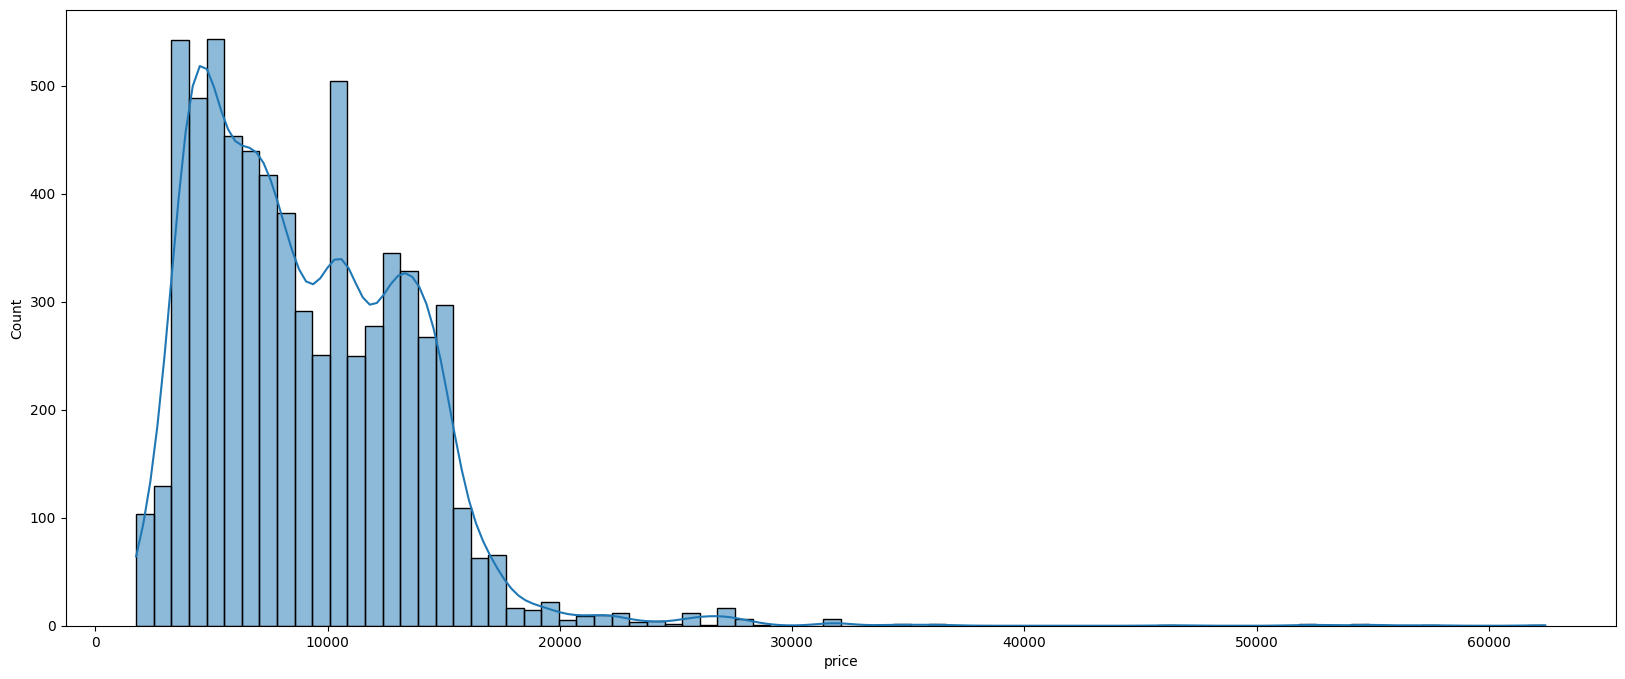

In [173]:
plt.figure(figsize=(20,8))
sns.histplot(train_df.price,kde=True)
plt.show()

In [174]:
train_df.price.skew()

np.float64(1.7614371150560943)

In [175]:
train_df.price.kurt()

np.float64(10.903065781035977)

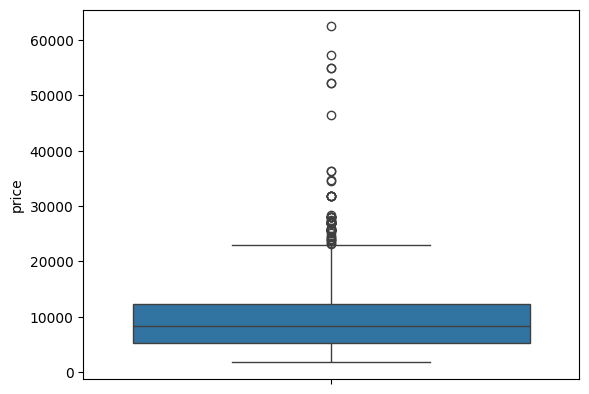

In [177]:
sns.boxplot(train_df.price)
plt.show()

<Axes: ylabel='price'>

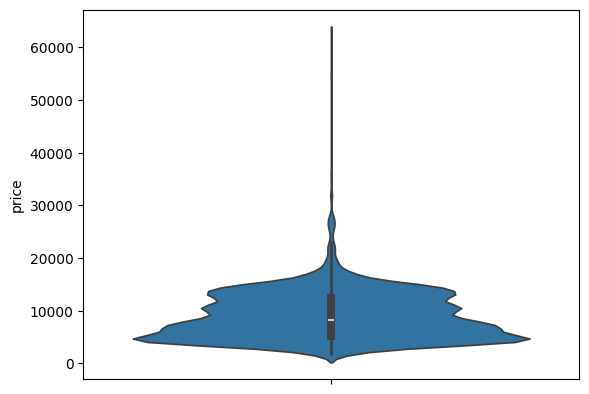

In [179]:
sns.violinplot(train_df.price)

In [181]:
percentile_25 = np.percentile(train_df.price,25)
percentile_75 = np.percentile(train_df.price,75)

iqr = percentile_75 - percentile_25
min_q = percentile_25 - (1.5*iqr)
max_q = percentile_75 + (1.5*iqr)

(min_q,max_q)

(np.float64(-5499.5), np.float64(23096.5))

## 7. Bivarate Analysis

### 7.1. airline vs price

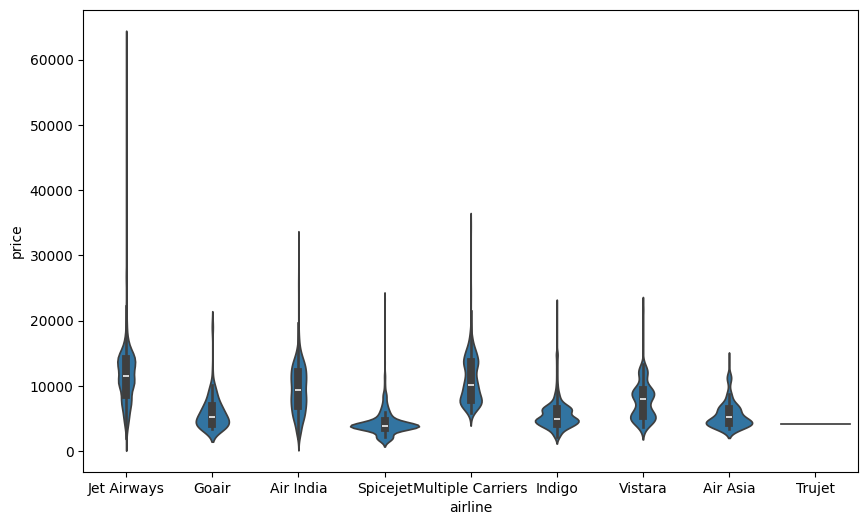

In [197]:
plt.figure(figsize=(10,6))
sns.violinplot(train_df,x='airline',y='price')
plt.show()

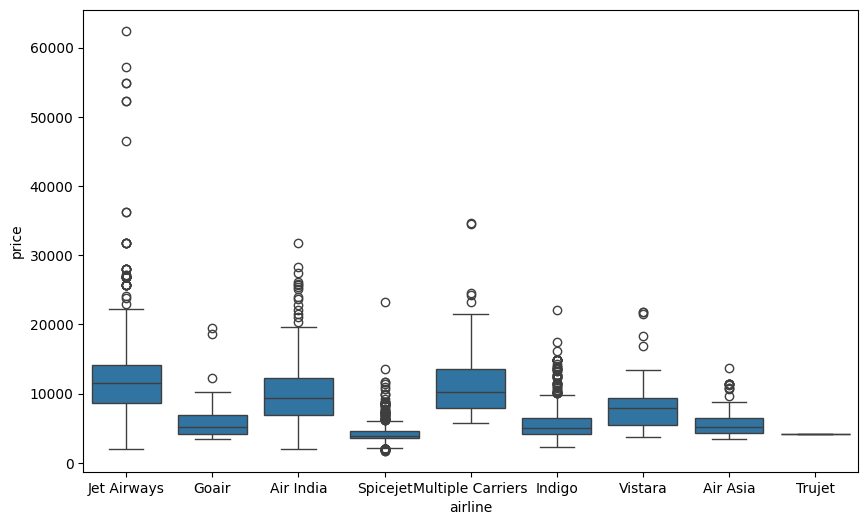

In [198]:
plt.figure(figsize=(10,6))
sns.boxplot(train_df,x='airline',y='price')
plt.show()

### 7.2. total_stops vs price

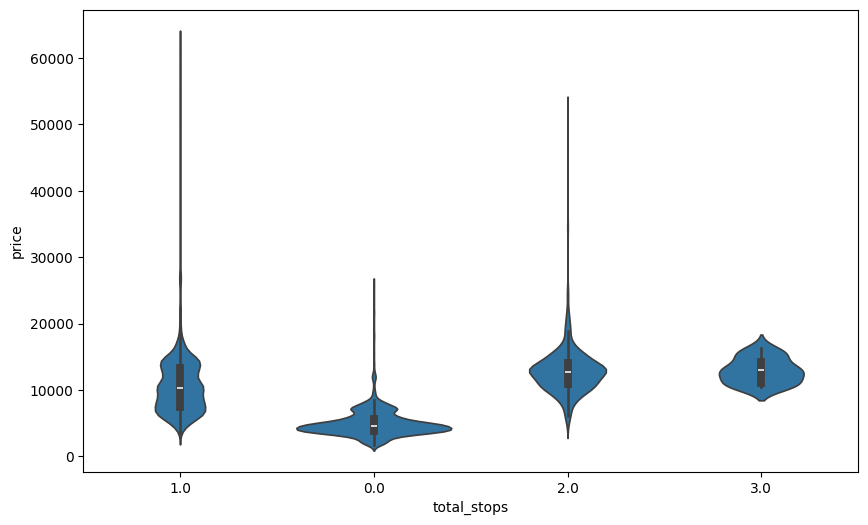

In [199]:
plt.figure(figsize=(10,6))
sns.violinplot(train_df,x='total_stops',y='price')
plt.show()

### 7.3. source vs price

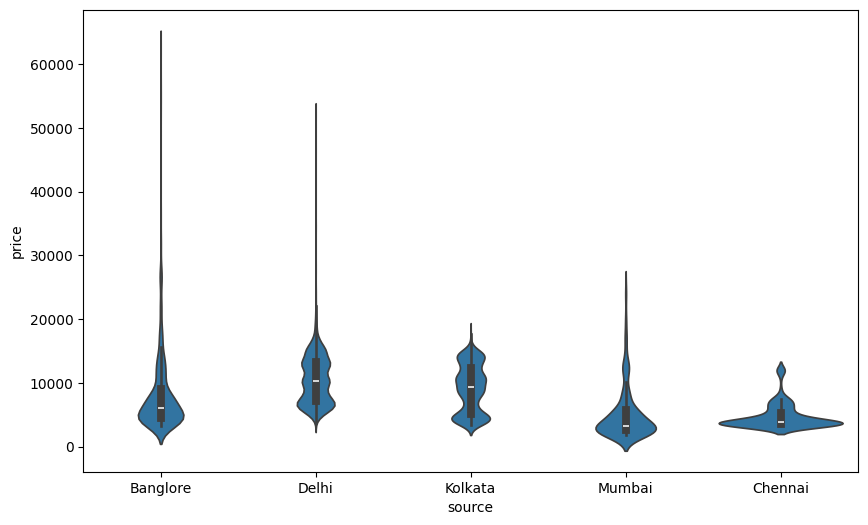

In [201]:
plt.figure(figsize=(10,6))
sns.violinplot(train_df,x='source',y='price')
plt.show()

### 7.4. destination vs price

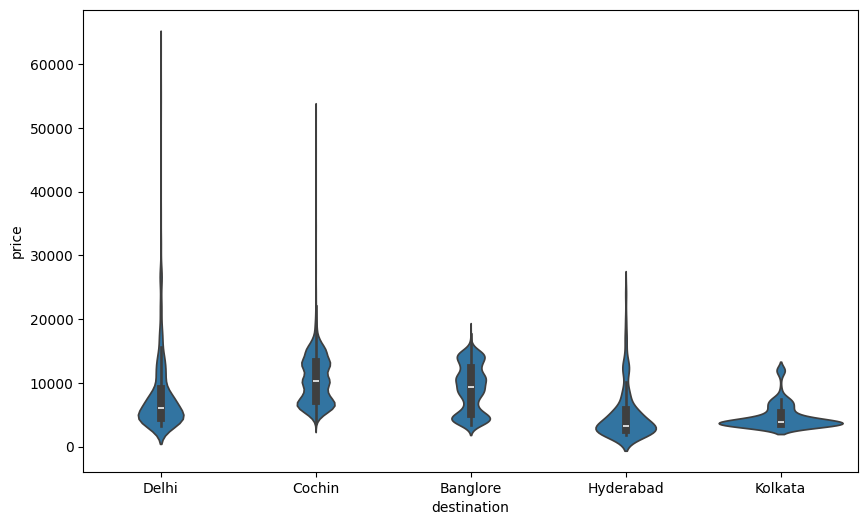

In [202]:
plt.figure(figsize=(10,6))
sns.violinplot(train_df,x='destination',y='price')
plt.show()

### 7.5. duration vs price

<Axes: xlabel='duration', ylabel='price'>

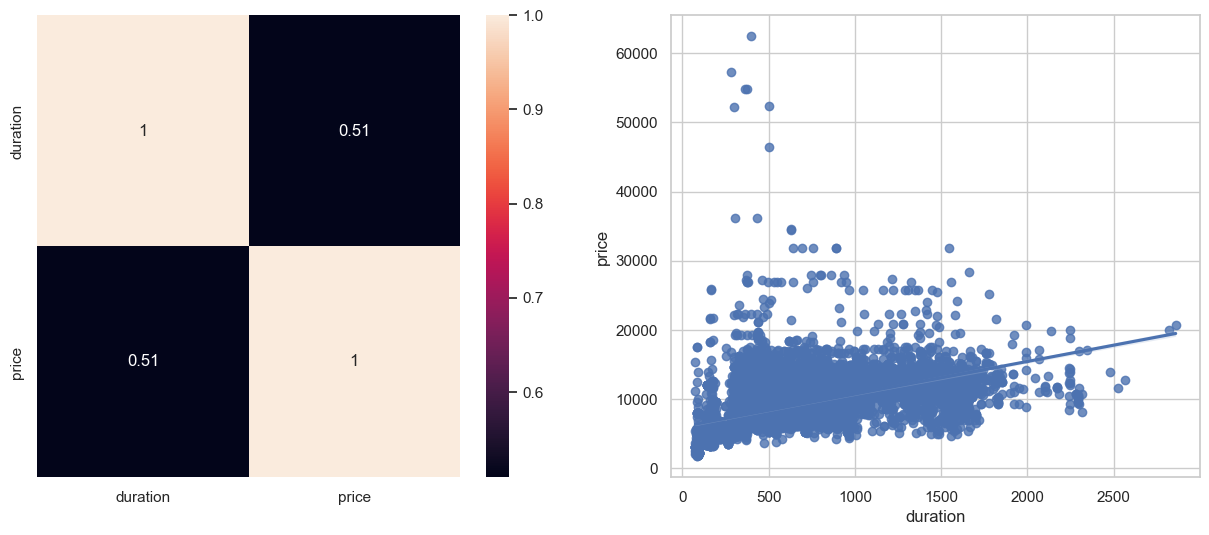

In [218]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(train_df[['duration','price']].corr(),annot=True)
plt.subplot(1,2,2)
sns.regplot(train_df,x='duration',y='price')

### 7.6. day_of_travel vs price

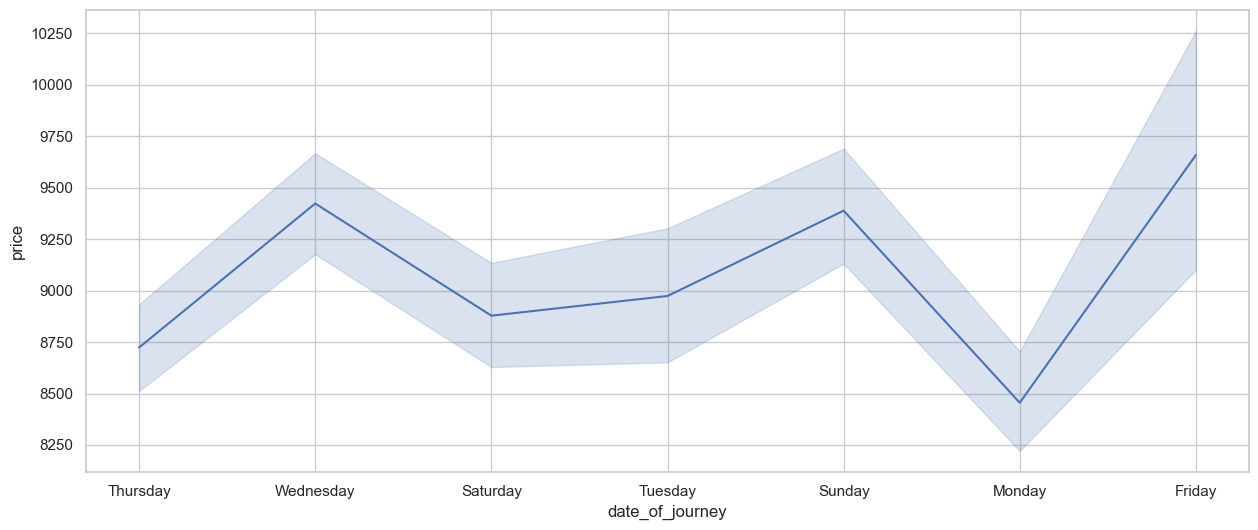

In [231]:
plt.figure(figsize=(15,6))
sns.lineplot(x=train_df.date_of_journey.dt.day_name(),y=train_df.price,legend='auto')
plt.show()

### 7.7. time_of_travel vs price

In [241]:
train_df.dep_time

0       08:55:00
1       17:30:00
2       11:40:00
3       09:25:00
4       22:55:00
          ...   
6690    10:45:00
6691    09:25:00
6692    14:00:00
6693    07:55:00
6694    11:50:00
Name: dep_time, Length: 6694, dtype: object

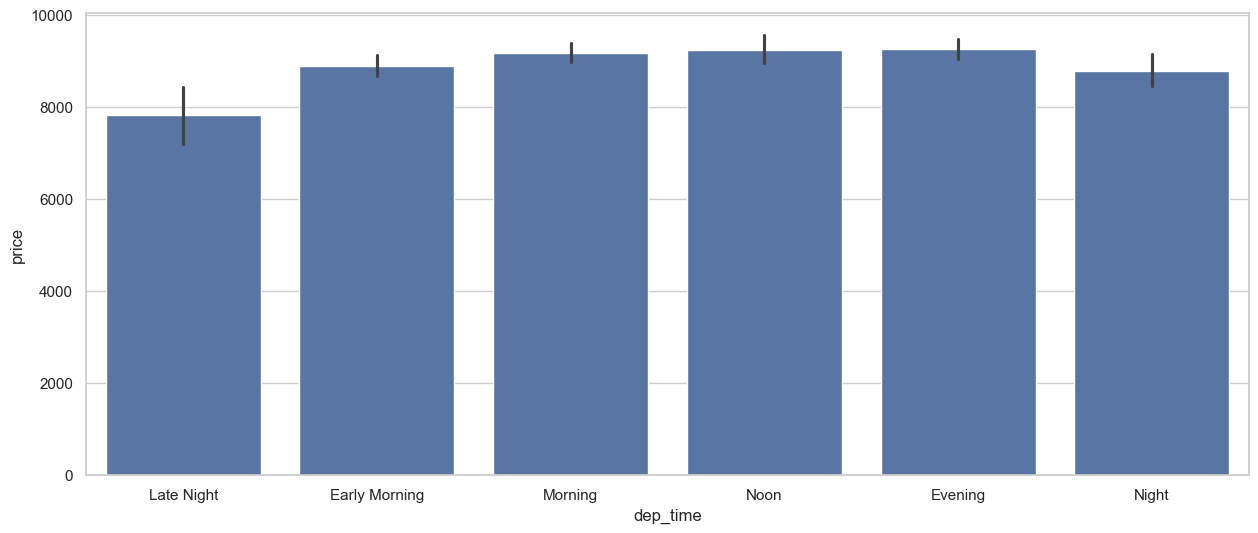

In [246]:
b = [datetime.time(0),datetime.time(4),datetime.time(8),datetime.time(12),datetime.time(16),datetime.time(20),datetime.time(23)]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
plt.figure(figsize=(15,6))
sns.barplot(x=pd.cut(train_df.dep_time,bins=b,labels=l),y=train_df.price)
plt.show()

### 7.8. airline vs source

In [247]:
pd.crosstab(train_df.airline, train_df.source)

source,Banglore,Chennai,Delhi,Kolkata,Mumbai
airline,,,,,
Air Asia,64,0,52,95,0
Air India,209,16,444,318,88
Goair,58,0,48,19,0
Indigo,316,119,451,280,130
Jet Airways,534,0,917,807,133
Multiple Carriers,0,0,736,0,0
Spicejet,129,77,50,201,80
Trujet,0,0,0,0,1
Vistara,125,28,31,122,16


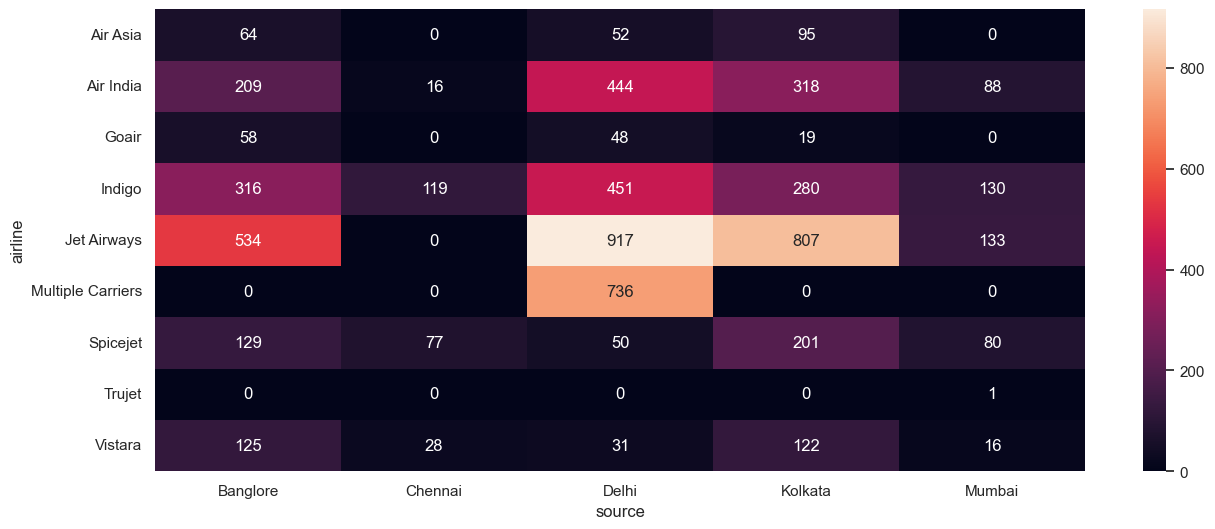

In [263]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(train_df.airline, train_df.source),annot=True,fmt='1')
plt.show()

### 7.9. airline vs total_stops

<Axes: xlabel='airline'>

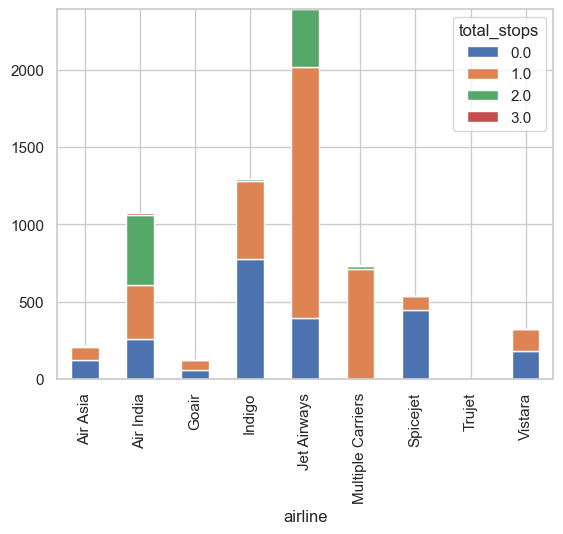

In [272]:
train_df.groupby(['airline', 'total_stops']).size().unstack().plot(kind='bar',stacked=True)